# Librerías

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import sounddevice as sd

# Diseño de Filtros FIR por IDFT

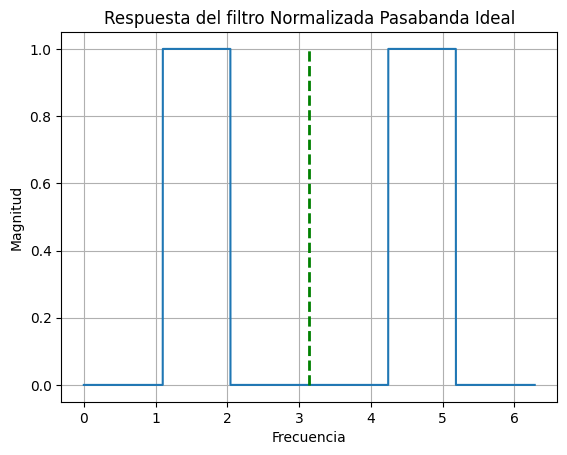

In [16]:


def ideal_bandpass_response(f1, f2, fs, N):

    w1n = 2 * np.pi * f1/ fs
    w2n = 2 * np.pi * f2/ fs
    freq = np.linspace(0, 2*np.pi, N)
    response = np.zeros_like(freq)
    response[(freq >= w1n) & (freq <= w2n)] = 1
    response[(freq >= 2*np.pi - w2n) & (freq <= 2*np.pi - w1n)] = 1
    return freq, response

f1 = 3500  # Lower cutoff frequency
f2 = 6500  # Upper cutoff frequency
fs = 20000  # Sampling frequency
N = 10000000  # Number of samples of the original signal

freq, response = ideal_bandpass_response(f1, f2, fs, N)

plt.plot(freq, response)
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.vlines([np.pi],0,1,color='g',lw=2.,linestyle='--')
plt.title('Respuesta del filtro Normalizada Pasabanda Ideal')
plt.grid(True)
plt.show()

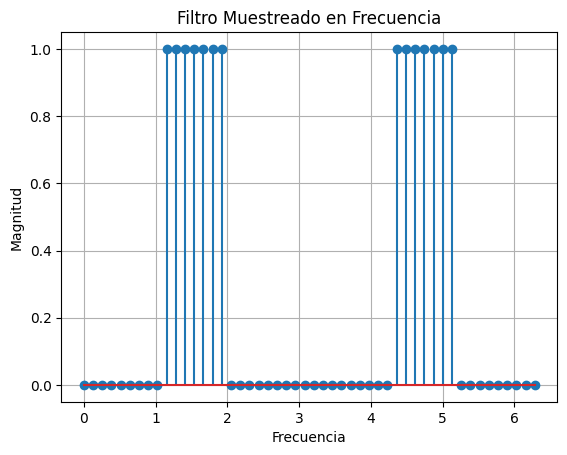

In [17]:
# Sampling the response 

Nm = 50  # Number of points
uniform_points = np.linspace(0, len(response)-1, Nm, dtype=int)
S_signal = response[uniform_points]

freq_s = np.linspace(0, 2*np.pi, Nm)
plt.stem(freq_s,S_signal)
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.title('Filtro Muestreado en Frecuencia')
plt.grid(True)

In [18]:
# IDFT

h_f = []
a = (Nm-1)/2

for n in range(int(Nm/2)):
    sum = 0
    for k in range(1,int(Nm/2)):
        sum += 2*abs(S_signal[k])*np.cos(2*np.pi*k*(n-a)/Nm)
    h_f.append((sum + S_signal[0])/Nm)

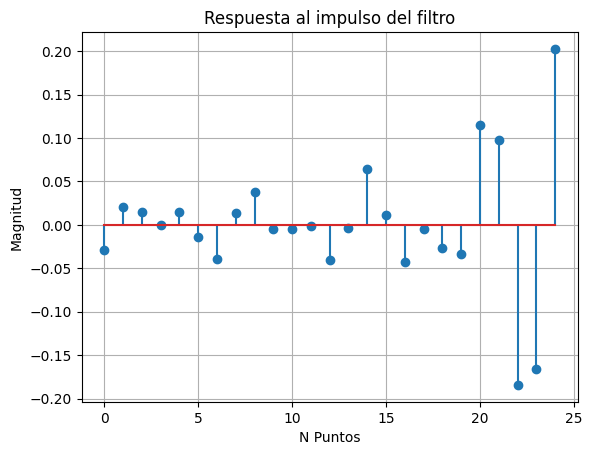

In [19]:
plt.stem(h_f)
plt.xlabel('N Puntos')
plt.ylabel('Magnitud')
plt.title('Respuesta al impulso del filtro')
plt.grid(True)
plt.show()


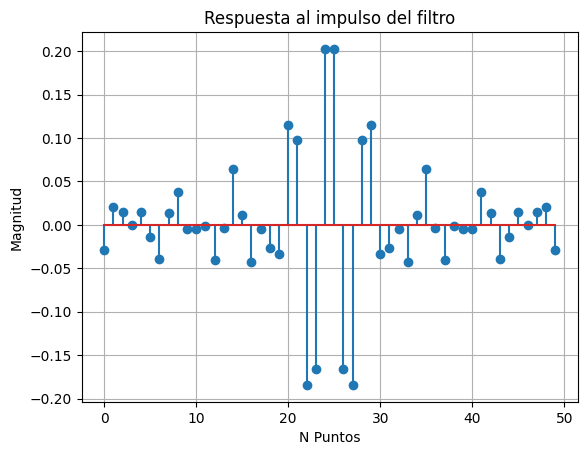

In [20]:
#Reflejar el filtro para el resto de coeficientes

ref_h_f = h_f[::-1]
hi = np.concatenate((h_f, ref_h_f))
plt.stem(hi)
plt.xlabel('N Puntos')
plt.ylabel('Magnitud')
plt.title('Respuesta al impulso del filtro')
plt.grid(True)
plt.show()

In [21]:
# Respuesta en frecuencia del filtro
w,Hh = signal.freqz(hi,1,whole=True, worN = 512) 

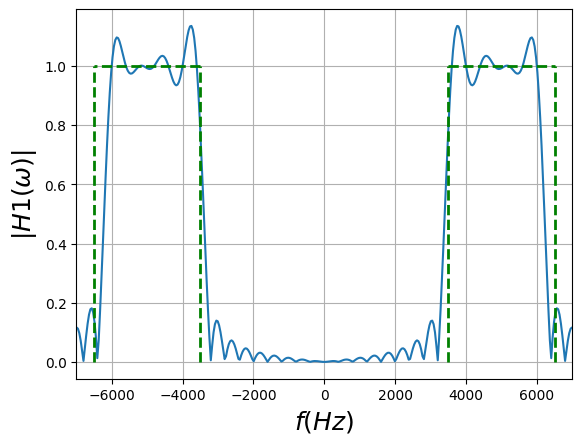

In [22]:
# Grafica de la respuesta en frecuencia del filtro

plt.plot((w-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh)))
plt.axis(xmax=fs/2,xmin=-fs/2)
plt.vlines([f1,f2],0,1,color='g',lw=2.,linestyle='--')
plt.hlines(1,f1,f2,color='g',lw=2.,linestyle='--')
plt.vlines([-f1,-f2],0,1,color='g',lw=2.,linestyle='--')
plt.hlines(1,-f1,-f2,color='g',lw=2.,linestyle='--')
plt.xlim(-2*f1,2*f1)
plt.xlabel(r"$f (Hz)$",fontsize=18)
plt.ylabel(r"$|H1(\omega)| $",fontsize=18)
plt.grid(True)

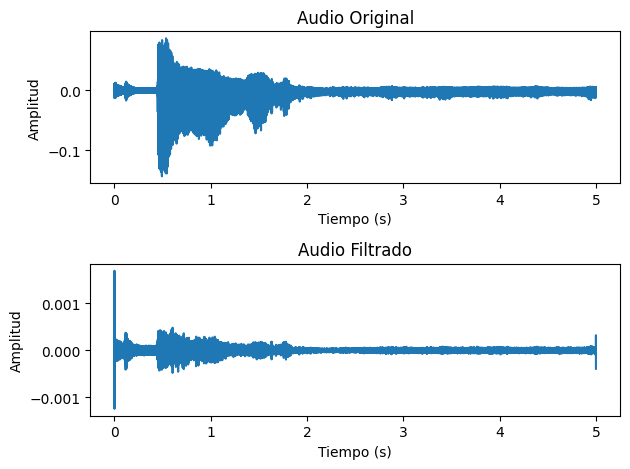

In [37]:
fs_a = 44100  # Sample rate (Hz)
duration = 5  # Duration of audio capture (seconds)

# Capture audio in real-time
audio = sd.rec(int(fs_a * duration), samplerate=fs_a, channels=1)
sd.wait()

# Apply the designed filter to the captured audio
filtered_audio = signal.convolve(audio[:, 0], hi, mode='same')

# Plot the original audio
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(audio)) / fs_a, audio[:, 0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Audio Original')

# Plot the filtered audio
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(filtered_audio)) / fs_a, filtered_audio)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Audio Filtrado')

# Display the plots
plt.tight_layout()
plt.show()


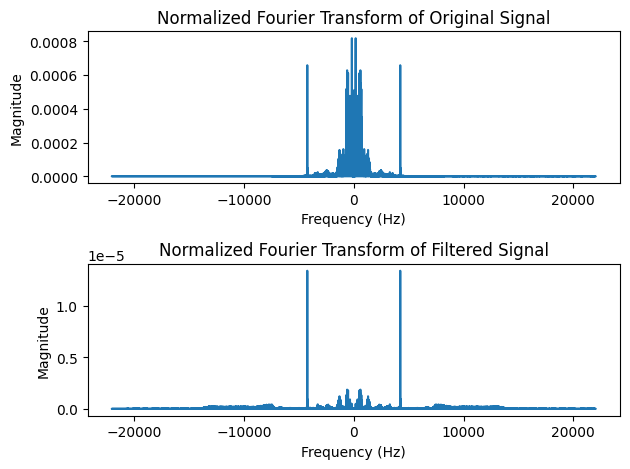

In [38]:
# Compute the Fourier transform of the original signal
original_fft = np.fft.fft(audio[:, 0])
original_freq = np.fft.fftfreq(len(original_fft), 1/fs_a)

# Compute the Fourier transform of the filtered signal
filtered_fft = np.fft.fft(filtered_audio)
filtered_freq = np.fft.fftfreq(len(filtered_fft), 1/fs_a)

# Plot the normalized Fourier transform in a subplot
plt.subplot(2, 1, 1)
plt.plot(original_freq, np.abs(original_fft) / len(original_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Normalized Fourier Transform of Original Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_freq, np.abs(filtered_fft) / len(filtered_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Normalized Fourier Transform of Filtered Signal')

# Display the plots
plt.tight_layout()
plt.show()
